# OCR with Paragraph, Line, and Word Segmentation

In [1]:

import cv2
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt


## Load the Image

In [3]:

# Update the image path as necessary
img_path = 'temp/page_01.png'  # Replace with your local path
image = cv2.imread(img_path, cv2.IMREAD_COLOR)


## Preprocessing

In [4]:

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Dilate to merge text lines into paragraphs
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
dilated = cv2.dilate(binary, kernel, iterations=1)


## Paragraph Detection

## Word Segmentation and Improved OCR

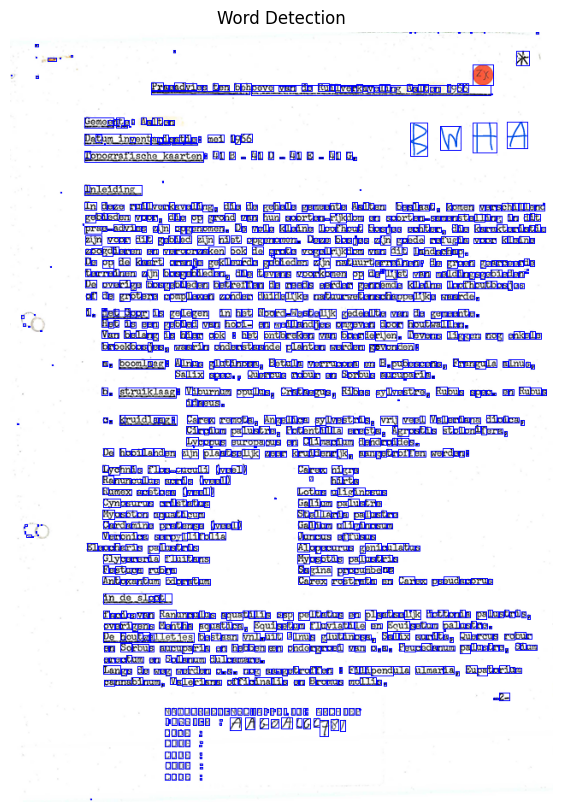

KeyboardInterrupt: 

In [10]:
# Word Segmentation
# Make sure 'segmented_image' is initialized
segmented_image = image.copy()  # Copy the original image for visualization

# Detect words within each line of text
word_boxes = []

for (x, y, w, h) in paragraph_boxes:
    # Focus on the paragraph ROI for better accuracy
    paragraph_roi = binary[y:y + h, x:x + w]
    
    # Line segmentation using horizontal projections
    hist = cv2.reduce(paragraph_roi, 1, cv2.REDUCE_AVG).reshape(-1)
    th = 2  # Threshold to detect text lines
    line_start = None
    lines = []
    
    for i, val in enumerate(hist):
        if val > th and line_start is None:
            line_start = i
        elif val <= th and line_start is not None:
            line_end = i
            lines.append((x, y + line_start, w, line_end - line_start))
            line_start = None

    # Detect words within each line
    for lx, ly, lw, lh in lines:
        line_roi = binary[ly:ly + lh, lx:lx + lw]
        word_contours, _ = cv2.findContours(line_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for word_contour in word_contours:
            wx, wy, ww, wh = cv2.boundingRect(word_contour)
            word_boxes.append((lx + wx, ly + wy, ww, wh))
            cv2.rectangle(segmented_image, (lx + wx, ly + wy), (lx + wx + ww, ly + wy + wh), (255, 0, 0), 1)

# Display detected words
plt.figure(figsize=(10, 10))
plt.title("Word Detection")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# OCR on words for improved results
final_word_results = []
for wx, wy, ww, wh in word_boxes:
    word_roi = gray[wy:wy + wh, wx:wx + ww]
    word_text = pytesseract.image_to_string(word_roi, lang='nld', config='--psm 7')  # Use Dutch language
    final_word_results.append(word_text.strip())

# Combine words into a coherent text
final_word_text = " ".join(final_word_results)
print(final_word_text)


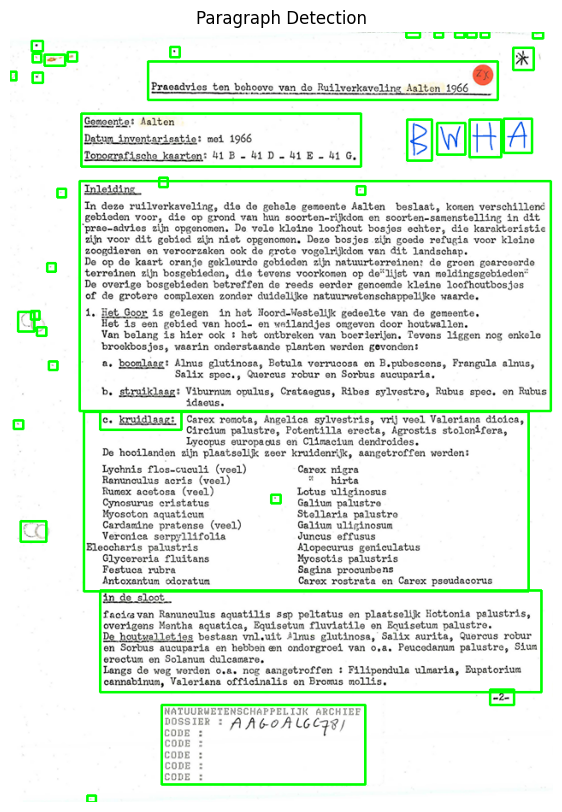

In [7]:

# Find contours to detect paragraphs
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy for visualization
segmented_image = image.copy()
paragraph_boxes = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    paragraph_boxes.append((x, y, w, h))
    cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display detected paragraphs
plt.figure(figsize=(10, 10))
plt.title("Paragraph Detection")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# Word Word Segmentation

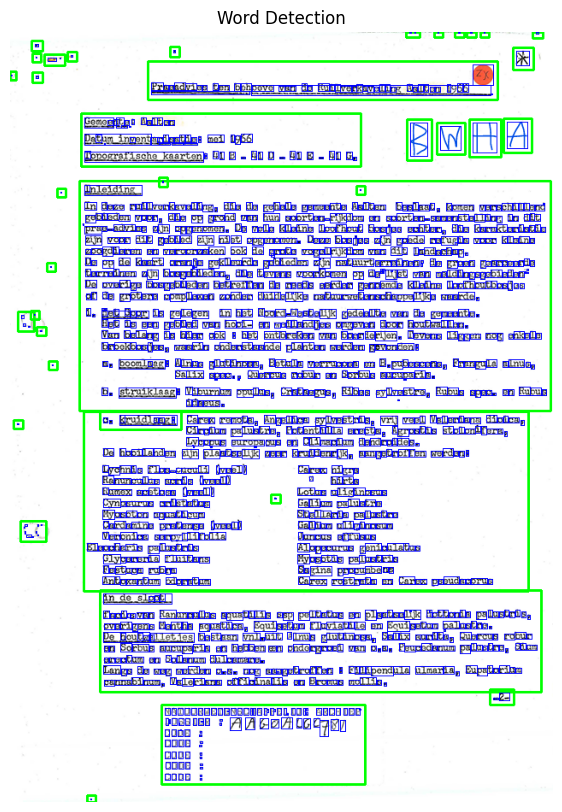

In [8]:
# Word Segmentation
# Detect words within each line of text
word_boxes = []

for (x, y, w, h) in paragraph_boxes:
    # Focus on the paragraph ROI for better accuracy
    paragraph_roi = binary[y:y + h, x:x + w]
    
    # Line segmentation using horizontal projections
    hist = cv2.reduce(paragraph_roi, 1, cv2.REDUCE_AVG).reshape(-1)
    th = 2  # Threshold to detect text lines
    line_start = None
    lines = []
    
    for i, val in enumerate(hist):
        if val > th and line_start is None:
            line_start = i
        elif val <= th and line_start is not None:
            line_end = i
            lines.append((x, y + line_start, w, line_end - line_start))
            line_start = None

    # Detect words within each line
    for lx, ly, lw, lh in lines:
        line_roi = binary[ly:ly + lh, lx:lx + lw]
        word_contours, _ = cv2.findContours(line_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for word_contour in word_contours:
            wx, wy, ww, wh = cv2.boundingRect(word_contour)
            word_boxes.append((lx + wx, ly + wy, ww, wh))
            cv2.rectangle(segmented_image, (lx + wx, ly + wy), (lx + wx + ww, ly + wy + wh), (255, 0, 0), 1)

# Display detected words
plt.figure(figsize=(10, 10))
plt.title("Word Detection")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


## OCR on Paragraphs

# match with place code


Matches found:
  Nr   Naam object Naam planeenheid Naam beheergebied  \
0  1  Westduinpark    Den Haag e.o.      Stad en Duin   
1  2     Kockengen  Utrechtse Venen      Utrecht-West   

  Naam provinciale eenheid Oppervlak (m2)  \
0             Zuid-Holland    68670318.55   
1                  Utrecht    47818921.16   

                                          PlaatsCode PlaatsCode 2  \
0                                        AAGOALGc781                
1  KO384823432042304*$*$&&@*#*@((#@(#(@#(#@234234...                

  PlaatsCode 3 Matched Field Match Value  Similarity Score  
0                         Nr           1             100.0  
1                         Nr           2             100.0  


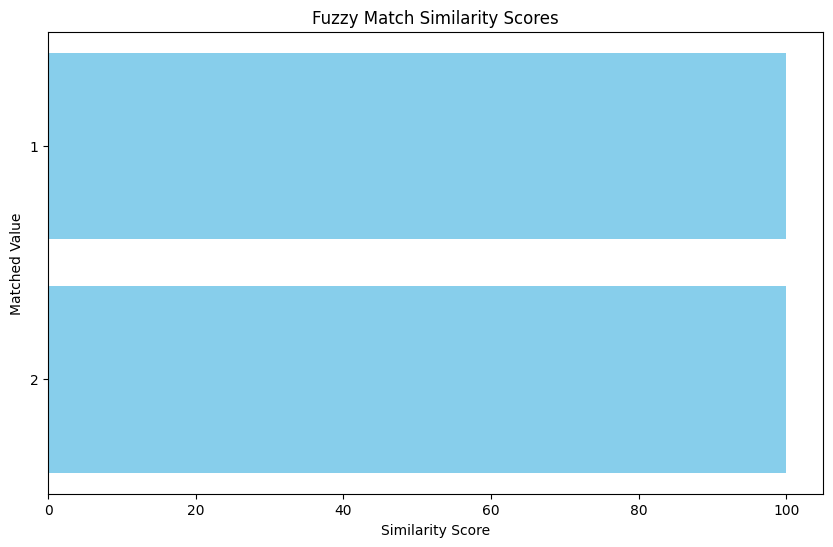

In [13]:
import pytesseract
from PIL import Image
import pandas as pd
from rapidfuzz import fuzz, process  # Faster alternative to fuzzywuzzy
import matplotlib.pyplot as plt

# Load the dataset
dataset = [
    {
        "Nr": "1",
        "Naam object": "Westduinpark",
        "Naam planeenheid": "Den Haag e.o.",
        "Naam beheergebied": "Stad en Duin",
        "Naam provinciale eenheid": "Zuid-Holland",
        "Oppervlak (m2)": "68670318.55",
        "PlaatsCode": "AAGOALGc781",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    },
    {
        "Nr": "2",
        "Naam object": "Kockengen",
        "Naam planeenheid": "Utrechtse Venen",
        "Naam beheergebied": "Utrecht-West",
        "Naam provinciale eenheid": "Utrecht",
        "Oppervlak (m2)": "47818921.16",
        "PlaatsCode": "KO384823432042304*$*$&&@*#*@((#@(#(@#(#@2342342342432CK",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    },
    {
        "Nr": "3",
        "Naam object": "De Ven",
        "Naam planeenheid": "IJsselmeeroevers",
        "Naam beheergebied": "De Kop",
        "Naam provinciale eenheid": "Noord-Holland",
        "Oppervlak (m2)": "11544634.71",
        "PlaatsCode": "DVEN",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    }
]

# Load the image
image_path = 'temp/page_01.png'  # Replace with your local image path
image = Image.open(image_path)

# Perform OCR with the Dutch language
ocr_result = pytesseract.image_to_string(image, lang='nld')
ocr_result = ocr_result.replace('\n', ' ')  # Flatten OCR text for easier matching

# Fuzzy match against dataset
matches = []
threshold = 80  # Minimum similarity score for a match

for record in dataset:
    for key, value in record.items():
        if value:  # Only compare non-empty values
            score = fuzz.partial_ratio(value, ocr_result)
            if score >= threshold:
                matches.append({
                    **record,
                    "Matched Field": key,
                    "Match Value": value,
                    "Similarity Score": score
                })

# Display matches in a DataFrame
matches_df = pd.DataFrame(matches)

if not matches_df.empty:
    # Sort by similarity score for better visualization
    matches_df = matches_df.sort_values(by="Similarity Score", ascending=False)

    print("Matches found:")
    print(matches_df)
    
    # Plot similarity scores
    plt.figure(figsize=(10, 6))
    plt.barh(matches_df["Match Value"], matches_df["Similarity Score"], color='skyblue')
    plt.xlabel("Similarity Score")
    plt.ylabel("Matched Value")
    plt.title("Fuzzy Match Similarity Scores")
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest score on top
    plt.show()
else:
    print("No matches found.")


In [9]:

# Perform OCR on each detected paragraph
optimized_text_results = []
for (x, y, w, h) in paragraph_boxes:
    paragraph_roi = gray[y:y + h, x:x + w]
    ocr_result = pytesseract.image_to_string(paragraph_roi, config='--psm 6')  # Paragraph mode
    optimized_text_results.append(ocr_result.strip())

# Combine all text
final_text = "\n\n".join(optimized_text_results)

# Save or print the final output
print(final_text)




jose AR OA LGCea
Bossier =

tongs | AGA LC CRY/
Cope

cone :

cope

cone

2e

Ande sloot_

facia van Ranunculus aqustilis ssp poltatus on plaatsolie Hottonis palustris,
cverigens Menthe aquatica, Equlsctun fluviatile on Bquisotun palustre.
Dovhoutwaliotios bostoan vni,uit Aims glutinosa, Salix surita, Giorcus rotur
en Sorbus aucupsria en hebben en ondergroei van 0.8, Peucedanum palustre, Siu
srectin on Solanin dileanare,

Langs de weg worden oa. nog asngetroffen : Filipendula ulmaria, Bupatoriua
cannabinun, Valoriana officinalis on Broms nollis.

co





ce. Kruidlasg: Carex romota, Angelica sylvestris, vrij veol Valeriana dioica,
Girciua palustre, Fotentilla erecta, Agrostis stolonifora,
Iycopns europacis on Clinaciun dendvoides.

Do hooilandon ain plaatsolik geor kruidenrik, sangetroffen werden:

Iychnis flos-cuculi (veel) Carex nigra

Ranunculus acris (veel) = hirta

Runex acotosa (veel) Lotus uliginosus

Cynosurus eristatue Galiua palustre

Myosoton aquaticus Stollaria palustre



# main 3


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Processing page 1...
No matches found on page 1.

Processing page 2...
No matches found on page 2.

Processing page 3...
Matches found on page 3: [{'Page': '3', 'PlaatsCode': 'DVEN', 'Similarity Score': 75.0}]
Saved matched page 3 to matched_pages\page_3.png


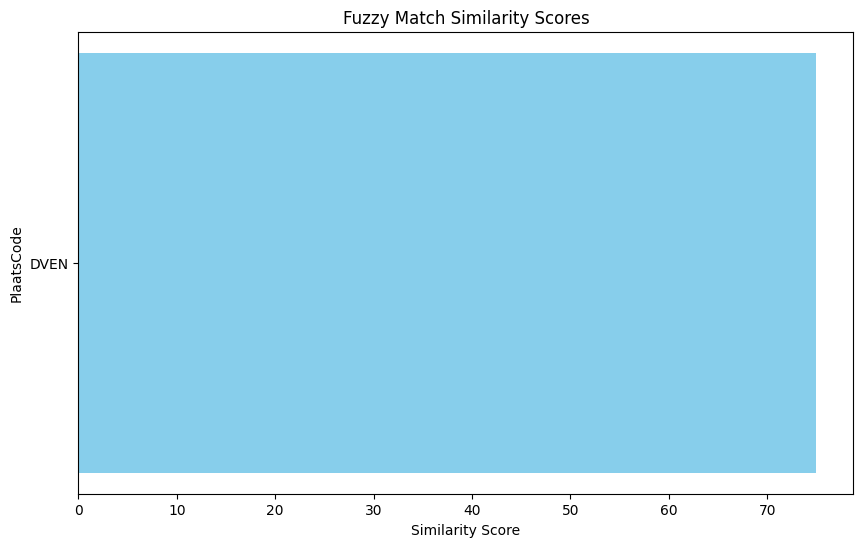


Summary of Matches:
Page 3: PlaatsCode: DVEN, Similarity Score: 75.0


In [16]:
import easyocr
from pdf2image import convert_from_path
import numpy as np
import re
import matplotlib.pyplot as plt
from rapidfuzz import fuzz
import os


# Convert PDF to images
def convert_pdf_to_images(pdf_path):
    try:
        return convert_from_path(pdf_path)
    except Exception as e:
        print(f"Error converting PDF to images: {e}")
        return []


# Extract handwritten text using EasyOCR
def extract_handwritten_text(image, reader):
    # Convert PIL image to numpy array for EasyOCR
    image_np = np.array(image)

    # Detect text in the image
    result = reader.readtext(image_np)

    # Extract and return all detected text
    extracted_text = "\n".join([text[1] for text in result])
    return extracted_text


# Match extracted text with dataset using fuzzy matching
def find_fuzzy_matches(extracted_text, dataset, threshold=75):
    matches = []

    for record in dataset:
        plaats_codes = [record.get("PlaatsCode"), record.get("PlaatsCode 2"), record.get("PlaatsCode 3")]
        for code in plaats_codes:
            if code:
                score = fuzz.partial_ratio(extracted_text, code)
                if score >= threshold:
                    matches.append({
                        "Page": record.get("Nr"),
                        "PlaatsCode": code,
                        "Similarity Score": score
                    })

    return matches


# Visualize the fuzzy matches
def visualize_fuzzy_matches(matches):
    if not matches:
        print("No matches found.")
        return

    codes = [match["PlaatsCode"] for match in matches]
    scores = [match["Similarity Score"] for match in matches]

    plt.figure(figsize=(10, 6))
    plt.barh(codes, scores, color='skyblue')
    plt.xlabel("Similarity Score")
    plt.ylabel("PlaatsCode")
    plt.title("Fuzzy Match Similarity Scores")
    plt.gca().invert_yaxis()
    plt.show()


# Save pages with matches
def save_pages_with_matches(images, matched_pages, output_dir="matched_pages"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for page_num in matched_pages:
        save_path = os.path.join(output_dir, f"page_{page_num + 1}.png")
        images[page_num].save(save_path)
        print(f"Saved matched page {page_num + 1} to {save_path}")


# Main processing function for PDFs
def process_pdf_for_matches(pdf_path, dataset, keyword, threshold=75):
    images = convert_pdf_to_images(pdf_path)
    if not images:
        print("No images were converted from the PDF.")
        return

    # Initialize EasyOCR reader once
    reader = easyocr.Reader(['en'])

    matches = []
    matched_pages = []  # To track pages with matches
    for page_num, image in enumerate(images):
        print(f"Processing page {page_num + 1}...")

        # Extract all handwritten text with EasyOCR
        extracted_text = extract_handwritten_text(image, reader)

        # Find matches in the dataset
        page_matches = find_fuzzy_matches(extracted_text, dataset, threshold)
        if page_matches:
            print(f"Matches found on page {page_num + 1}: {page_matches}")
            matches.extend(page_matches)
            matched_pages.append(page_num)
        else:
            print(f"No matches found on page {page_num + 1}.\n")

    # Save matched pages
    save_pages_with_matches(images, matched_pages)

    # Visualize matches
    visualize_fuzzy_matches(matches)

    if matches:
        print("\nSummary of Matches:")
        for match in matches:
            print(f"Page {match['Page']}: PlaatsCode: {match['PlaatsCode']}, Similarity Score: {match['Similarity Score']}")
    else:
        print("No matches found in the document.")


# Example usage
pdf_path = 'dir/ZX.pdf'  # Replace with the path to your PDF
keyword = 'Dossier'  # Keyword to focus on
threshold = 75  # Fuzzy matching threshold

# Load dataset
dataset = [
    {
        "Nr": "1",
        "Naam object": "Westduinpark",
        "Naam planeenheid": "Den Haag e.o.",
        "Naam beheergebied": "Stad en Duin",
        "Naam provinciale eenheid": "Zuid-Holland",
        "Oppervlak (m2)": "68670318.55",
        "PlaatsCode": "AAGOALGc781",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    },
    {
        "Nr": "2",
        "Naam object": "Kockengen",
        "Naam planeenheid": "Utrechtse Venen",
        "Naam beheergebied": "Utrecht-West",
        "Naam provinciale eenheid": "Utrecht",
        "Oppervlak (m2)": "47818921.16",
        "PlaatsCode": "KO384823432042304*$*$&&@*#*@((#@(#(@#(#@2342342342432CK",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    },
    {
        "Nr": "3",
        "Naam object": "De Ven",
        "Naam planeenheid": "IJsselmeeroevers",
        "Naam beheergebied": "De Kop",
        "Naam provinciale eenheid": "Noord-Holland",
        "Oppervlak (m2)": "11544634.71",
        "PlaatsCode": "DVEN",
        "PlaatsCode 2": "",
        "PlaatsCode 3": ""
    }
]

# Process PDF for matches
process_pdf_for_matches(pdf_path, dataset, keyword, threshold)
